In [65]:
import numpy as np
import pandas as pd
import sys
import json
import os
import copy
import matplotlib.pyplot as plt
import scipy
import multiprocessing
import h5py
import corner
import dynesty

Load save:

In [86]:
dsampler = dynesty.DynamicNestedSampler.restore('dynesty_saves/1994_02_01_restricted_heights.save')
results = dsampler.results
samples = results.samples
ndim = len(samples.T)

Summary:

In [87]:
results.summary()

Summary
niter: 34528
ncall: 7060473
eff(%):  0.475
logz: -104.841 +/-  0.249


In [88]:
# directory = './dynesty_saves'
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if os.path.isfile(f):
#         dsamp = dynesty.DynamicNestedSampler.restore(f)
#         print(filename, dsamp.results.samples_n)

In [89]:
samples[-1]

array([1.51493068e+06, 2.34928453e+00, 8.96343795e+00, 3.70111243e+00,
       6.09534100e+00, 6.18483019e+01, 3.94756158e+01, 5.75429007e+01,
       5.79583438e-07, 1.06953420e-06, 9.25087287e-07, 1.26557137e-07,
       5.20048027e-08, 8.73529584e-08, 1.05581973e-07, 4.99926495e-03,
       1.11346047e-02, 6.80766631e-02, 1.07372440e+00, 1.54383931e-02,
       1.59346438e+00, 1.50123871e-02, 5.14246428e+00, 2.24214454e+00,
       4.62236456e-01, 4.19270810e+00, 4.21790890e-02, 4.71433403e+00,
       4.66239807e+00, 4.58786516e+04, 4.06642884e+04, 3.61568942e+04,
       3.39156849e+04, 2.69996048e+04, 2.39599270e+04, 2.19496749e+04])

Samples:

Text(0, 0.5, 'mass')

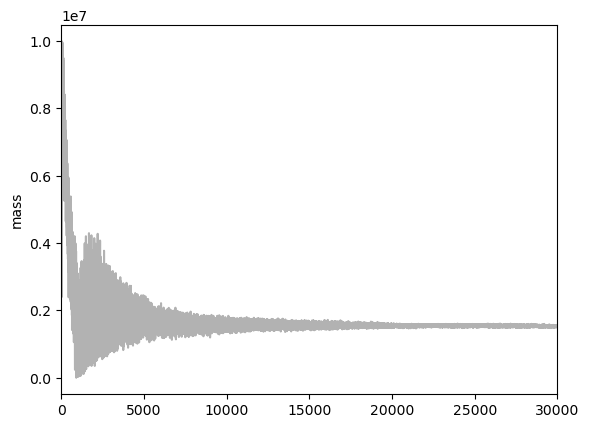

In [90]:
plt.plot(samples[:, 0], 'k', alpha=0.3)
plt.xlim(0., 30000.)
plt.ylabel('mass')

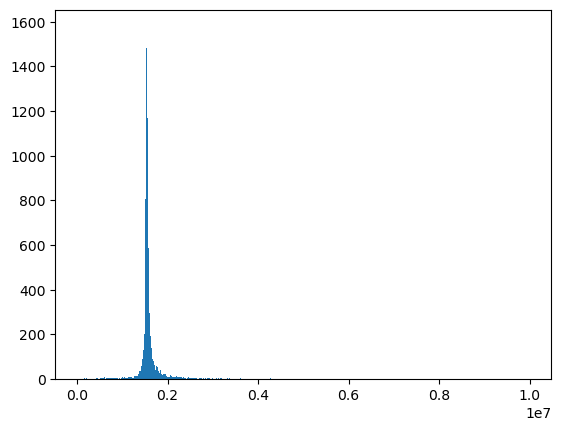

In [91]:
plt.hist(samples[:, 0].flatten(), bins='auto')
plt.show()

dyplots:

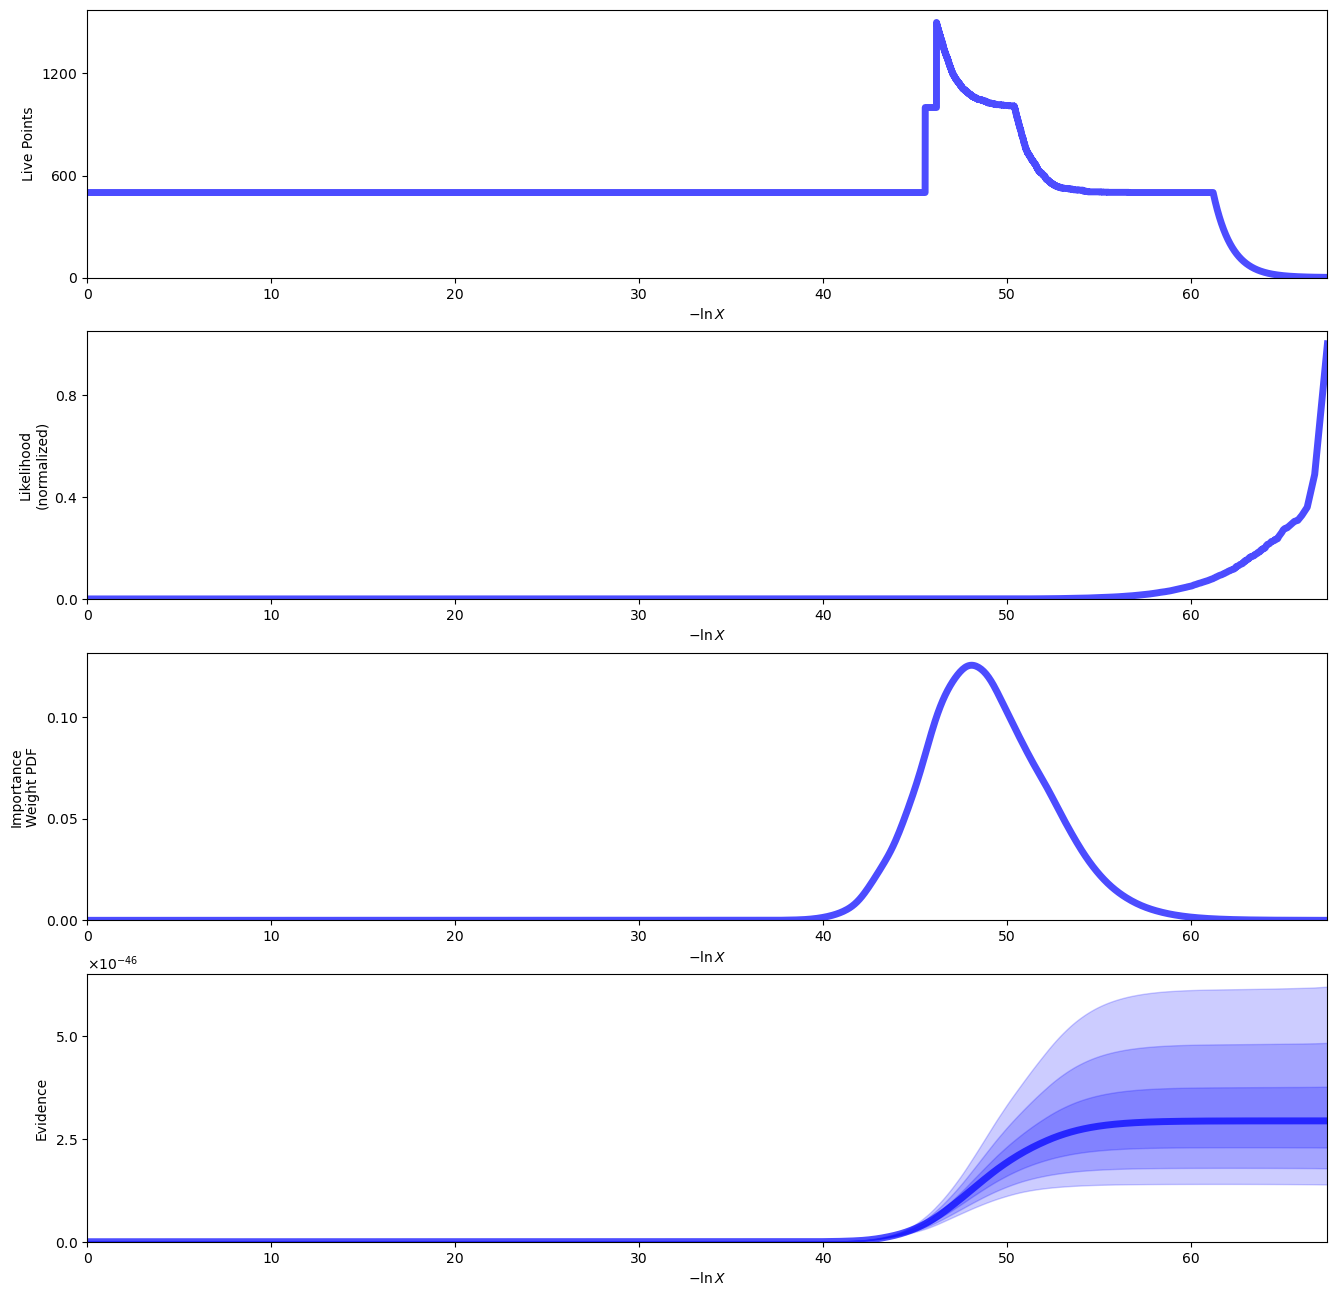

In [92]:
from dynesty import plotting as dyplot
fig, axes = dyplot.runplot(results)#, lnz_truth=lnz_truth)  # summary (run) plot

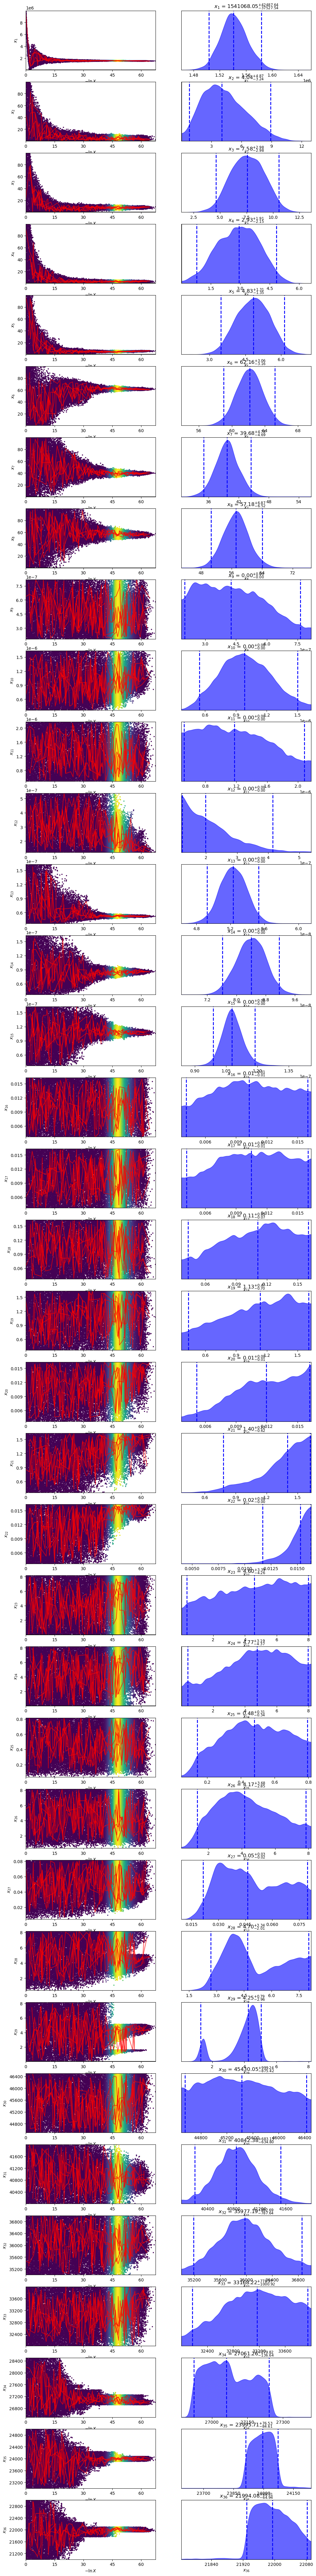

In [93]:
fig, axes = dyplot.traceplot(results, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))

In [94]:
# fg, ax = dyplot.cornerplot(results, color='dodgerblue', truths=np.zeros(ndim),
#                            truth_color='black', show_titles=True,
#                            quantiles=None, max_n_ticks=3)

In [95]:
print(dsampler.cite)

Code and Methods:
Speagle (2020): ui.adsabs.harvard.edu/abs/2020MNRAS.493.3132S
Koposov et al. (2023): doi.org/10.5281/zenodo.3348367

Nested Sampling:
Skilling (2004): ui.adsabs.harvard.edu/abs/2004AIPC..735..395S
Skilling (2006): projecteuclid.org/euclid.ba/1340370944
Dynamic Nested Sampling:
Higson et al. (2019): doi.org/10.1007/s11222-018-9844-0

Bounding Method:
Feroz, Hobson & Bridges (2009): ui.adsabs.harvard.edu/abs/2009MNRAS.398.1601F

Sampling Method:
Neal (2003):: projecteuclid.org/euclid.aos/1056562461
Handley, Hobson & Lasenby (2015a): ui.adsabs.harvard.edu/abs/2015MNRAS.450L..61H
Handley, Hobson & Lasenby (2015b): ui.adsabs.harvard.edu/abs/2015MNRAS.453.4384H

